# Visualization

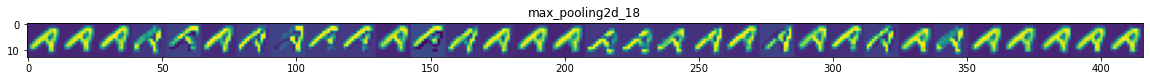

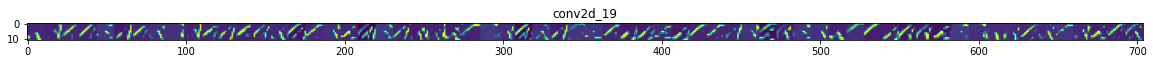

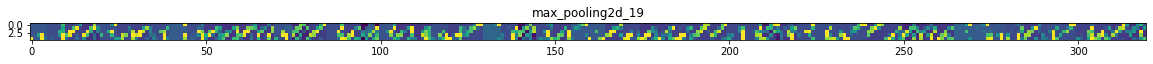

In [8]:
# Import requiered packaages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


img_path = './test/A/image_10077.png'

def visualize(path):
    # load model
    model = tf.keras.models.load_model('./model')

    # intermediate layers in model
    successive_output = [layer.output for layer in model.layers[1:]]

    visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_output)


    img = tf.keras.preprocessing.image.load_img(path, color_mode="grayscale", target_size=(28, 28))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    # rescale by 1/255
    x /= 255

    # obtain all intermediate representation for this image
    successive_features_maps = visualization_model.predict(x)

    # these are the names of the layers, so can heve them as part of our plot
    layer_names = [layer.name for layer in model.layers[1:]]

    # Display representation
    for layer_name, feature_map in zip(layer_names, successive_features_maps):
        if len(feature_map.shape) == 4:
            n_features = feature_map.shape[-1]

            size = feature_map.shape[1]

            display_grid = np.zeros((size, size * n_features))

            for i in range(n_features):
                # postprocess the features to make it visually palatable
                x = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')

                display_grid[:, i * size : (i + 1) * size] = x
            # Display the grid
            scale = 20./ n_features
            plt.figure(figsize=(scale * n_features, scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()


visualize(img_path)

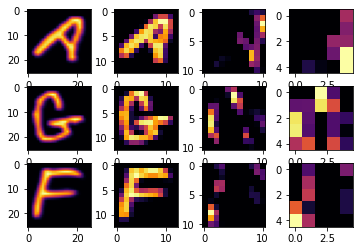

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# load model
model = tf.keras.models.load_model('./model')


f, axarr = plt.subplots(3,4)
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
# print(len(layer_outputs))
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
# predicting images
path = './test/A/image_10077.png'
img = image.load_img(path, target_size=(28, 28), color_mode="grayscale")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
f_image = np.vstack([x])

path = './test/G/image_10035.png'
img = image.load_img(path, target_size=(28, 28), color_mode="grayscale")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
s_image = np.vstack([x])

path = './test/F/image_10114.png'
img = image.load_img(path, target_size=(28, 28), color_mode="grayscale")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
t_image = np.vstack([x])


for x in range(0,4):
  f1 = activation_model.predict(f_image)[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(s_image)[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(t_image)[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)